In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle
import cv2

In [2]:
train_df = pd.read_csv("./MNIST_data_csv/mnist_train.csv")
test_df = pd.read_csv("./MNIST_data_csv/mnist_test.csv")

In [3]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [4]:
train_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_arr = np.array(train_df)
test_arr = np.array(test_df)

# Shuffle the data
np.random.shuffle(train_arr)
np.random.shuffle(test_arr)

In [7]:
X_train, Y_train = train_arr[:, 1:], train_arr[:, 0]
X_test, Y_test = test_arr[:, 1:], test_arr[:, 0]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

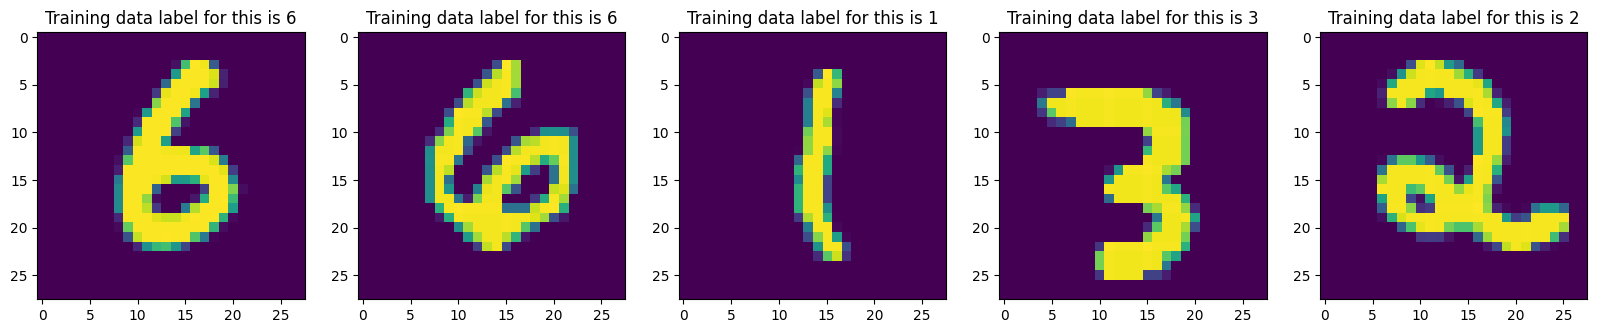

In [8]:
plt.figure(figsize=(20, 20))
for idx, data in enumerate(X_train[:5, :]):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(data, (28, 28)))
    plt.title(f"Training data label for this is {Y_train[idx]}")

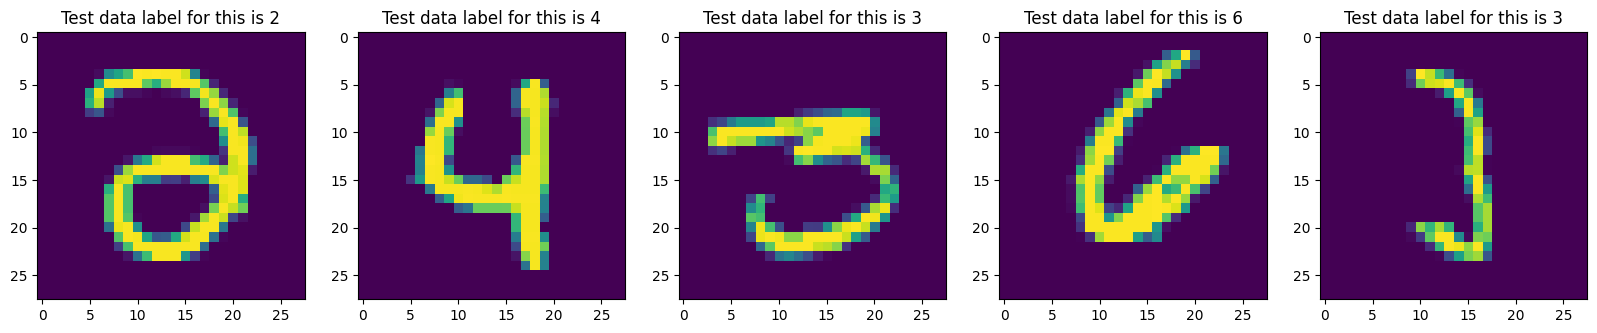

In [9]:
plt.figure(figsize=(20, 20))
for idx, data in enumerate(X_test[:5, :]):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(data, (28, 28)))
    plt.title(f"Test data label for this is {Y_test[idx]}")

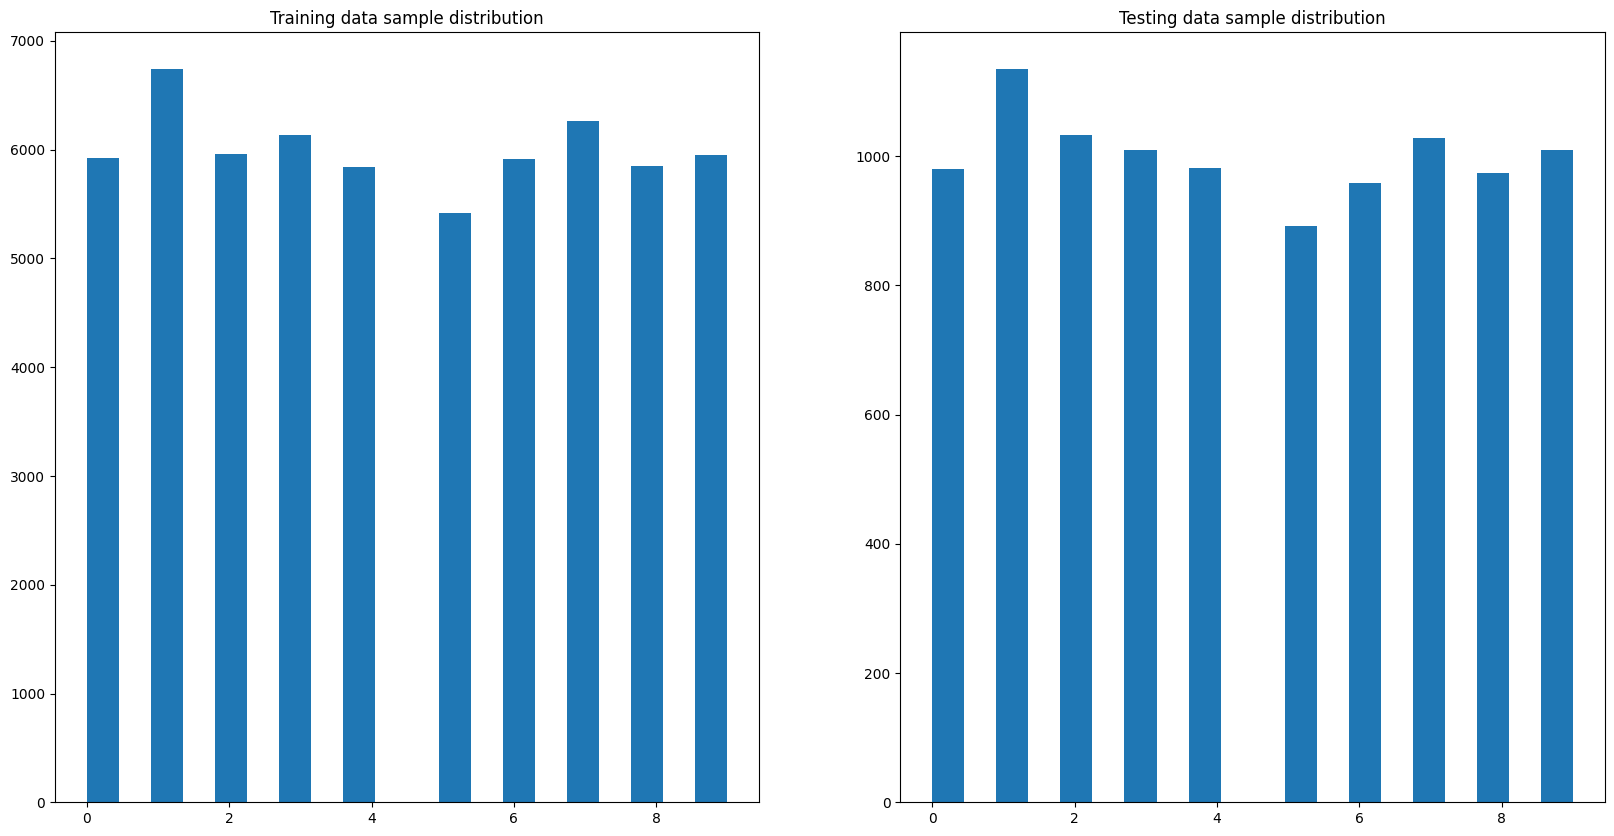

In [10]:
# Start EDA
# Use histogram to observe how is the data distributed
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=20)
plt.title("Training data sample distribution")

plt.subplot(1, 2, 2)
plt.hist(Y_test, bins=20)
plt.title("Testing data sample distribution")
plt.show()

In [11]:
# Normalize the data
# Divide each data by 255

X_train_normalized = X_train / 255
X_train_normalized[0, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
X_test_normalized = X_test / 255

In [13]:
model = LogisticRegression(max_iter=1000, fit_intercept=True)
model.fit(X_train_normalized, Y_train)

LogisticRegression(max_iter=1000)

In [14]:
filename = "logistic_regression_ocr.pickle"
file = open(filename, "wb")
pickle.dump(model, file)
file.close()

In [16]:
train_pred = model.predict(X_train_normalized)
test_pred = model.predict(X_test_normalized)
train_accuracy = accuracy_score(Y_train, train_pred)
test_accuracy = accuracy_score(Y_test, test_pred)

print(f"Training Accuracy: {round(train_accuracy * 100, 4)}")
print(f"Testing Accuracy: {round(train_accuracy * 100, 4)}")

Training Accuracy: 93.8567
Testing Accuracy: 93.8567


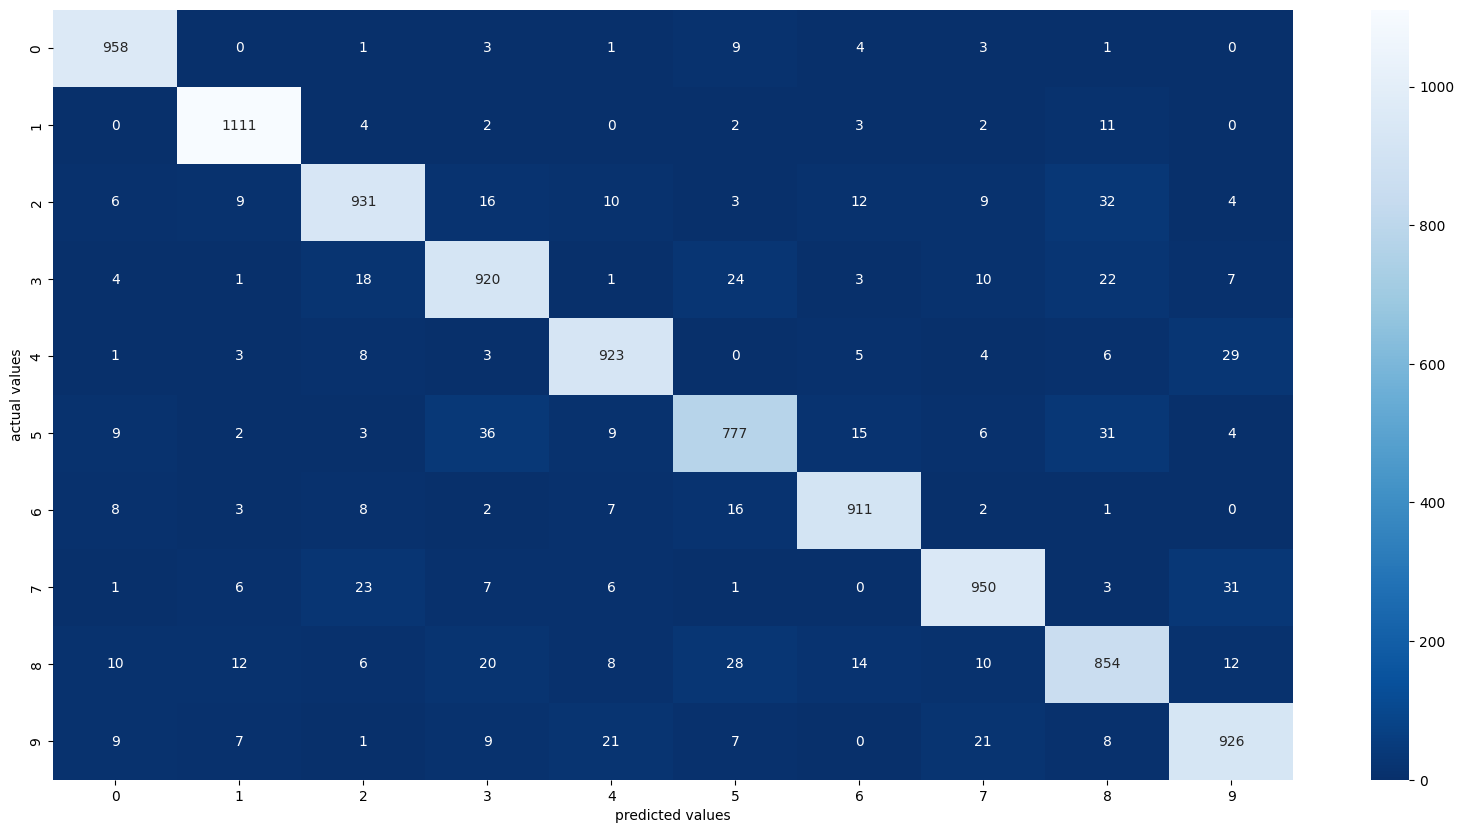

In [21]:
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap="Blues_r", fmt="0.4g")
plt.xlabel("predicted values")
plt.ylabel("actual values")

plt.show()